# SimpDM imputed results analysis

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import hyperimpute
from hyperimpute.plugins.utils.metrics import RMSE

Read in original data, imputed data, and mask:

In [5]:
simpdm_imputed = {}  
simpdm_imputed_unreg = {}
gt = {}
mask = {}

for prop in [0.1, 0.3, 0.5, 0.7]:
    simpdm_imputed[prop] = [] 
    simpdm_imputed_unreg[prop] = [] 
    gt[prop] = [] 
    mask[prop] = [] 
    for trial in range(5):
        df = pd.read_csv(f"/work/ts518/sta571/Imbalanced_data/SimpDM/FINAL_SimpDM_imputed_unbalanced_misprop_{prop}_trial{trial}.csv", header=None)
        simpdm_imputed[prop].append(df)
        df = pd.read_csv(f"/work/ts518/sta571/Imbalanced_data/SimpDM/FINAL_SimpDM_imputed_unreg_unbalanced_misprop_{prop}_trial{trial}.csv", header=None)
        simpdm_imputed_unreg[prop].append(df)
        df = pd.read_csv(f"/work/ts518/sta571/Imbalanced_data/SimpDM/FINAL_test_gt_unbalanced_misprop_{prop}_trial{trial}.csv", header=None)
        gt[prop].append(df)
        df = pd.read_csv(f"/work/ts518/sta571/Imbalanced_data/SimpDM/FINAL_mask_unbalanced_misprop_{prop}_trial{trial}.csv", header=None)
        mask[prop].append(df)

In [6]:
simpdm_imputed[0.3][0].head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.033230,0.000520,0.000364,0.000018,0.000012,0.002094,0.725874,1.000000,2.364553e-06,0.000379,...,0.009508,0.0,0.000000,0.000000,0.009525,0.000000,0.000000,0.000000,-0.00234,0.800948
1,0.032444,0.001352,0.005181,0.000054,0.002951,0.000078,0.243137,0.992126,5.521514e-04,0.022458,...,0.000000,0.0,0.015625,0.018337,0.019806,0.020268,0.000000,0.081967,0.00000,0.856088
2,0.027052,0.000728,0.001458,0.000026,0.000900,0.000014,0.800474,0.992126,-5.151480e-04,0.002717,...,0.011060,0.0,0.042496,0.005391,0.005335,0.007906,0.016949,0.081967,0.00000,0.000000
3,0.028027,0.001144,0.001093,0.000046,0.000053,0.001055,0.732239,0.992126,4.576117e-07,0.000150,...,0.000000,0.0,0.031250,0.008937,0.009500,0.013022,0.016949,0.028181,0.00000,0.798897
4,0.030190,0.002489,0.000547,0.000039,0.000018,0.000033,0.996078,0.982066,1.429776e-06,0.000178,...,0.009690,0.0,0.609375,0.000000,0.000000,0.011699,0.030552,0.034161,0.00000,0.000000


In [7]:
gt[0.3][0].head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.002025,0.000520,0.000364,0.000018,0.000012,0.000074,0.988235,1.000000,2.364553e-06,0.000379,...,0.00,0.0,0.000000,0.00,0.00,0.0,0.000000,0.000000,0.0,0.0
1,0.010832,0.001352,0.003463,0.000054,0.002867,0.000078,0.243137,0.992126,1.401989e-06,0.022458,...,0.00,0.0,0.015625,0.00,0.00,0.0,0.000000,0.081967,0.0,0.0
2,0.027052,0.000728,0.001458,0.000026,0.000900,0.000014,0.243137,0.992126,2.625704e-07,0.002717,...,0.00,0.0,0.031250,0.00,0.00,0.0,0.016949,0.081967,0.0,0.0
3,0.028027,0.001144,0.001093,0.000046,0.000053,0.000014,0.243137,0.992126,4.576117e-07,0.000150,...,0.00,0.0,0.031250,0.25,0.25,0.0,0.016949,0.000000,0.0,0.0
4,0.007491,0.000936,0.000547,0.000039,0.000018,0.000033,0.996078,0.992126,1.429776e-06,0.000178,...,0.02,0.0,0.609375,0.00,0.00,0.0,0.016949,0.622951,0.0,0.0


In [8]:
mask[0.3][0].head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0


Read in RMSEs:

In [13]:
all_rmses = {}

for prop in [0.1, 0.3, 0.5, 0.7]:
    with open(f"/work/ts518/sta571/Imbalanced_data/SimpDM/FINAL_SimpDM_imputed_unbalanced_misprop_{prop}_rmse_dict.json", 
              'r') as file:
        rmse = json.load(file)
        all_rmses[prop] = rmse["rmse"]

In [14]:
all_rmses

{0.1: '0.0894+-0.0012',
 0.3: '0.1057+-0.0025',
 0.5: '0.1221+-0.0006',
 0.7: '0.1460+-0.0016'}

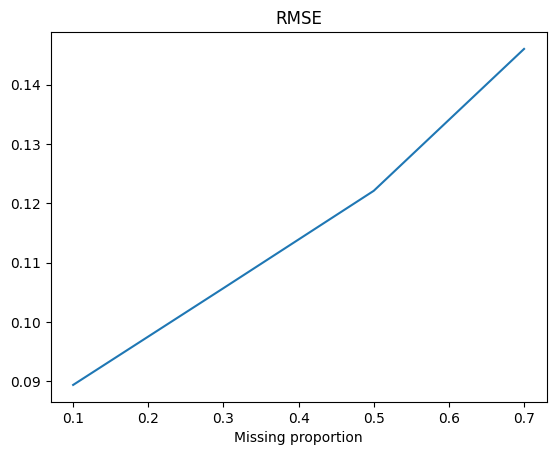

In [15]:
plt.plot(list(all_rmses.keys()), [float(str(v)[:6]) for v in list(all_rmses.values())[0:6]])
plt.title("RMSE")
plt.xlabel("Missing proportion")
plt.show()

In [16]:
mask[0.3][0].shape

(175341, 40)

In [17]:
df = pd.read_csv("/work/ts518/sta571/Imbalanced_data/data/unbalanced_data_standardized.csv")

In [18]:
df.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,attack_cat,attack_cat_encode
0,-0.191029,-0.104456,-0.135769,-0.049134,-0.102726,-0.576371,252,254,-0.389897,-0.273700,...,-0.705529,0,0,0,-0.715714,-0.753074,0,0,Normal,6
1,-0.109485,-0.046014,0.172599,-0.046410,0.188544,-0.576345,62,252,-0.389928,-0.069233,...,-0.614256,0,0,0,-0.715714,-0.288257,0,0,Normal,6
2,0.040699,-0.089845,-0.026933,-0.048527,-0.012133,-0.576734,62,252,-0.389964,-0.252044,...,-0.522983,0,0,0,-0.595543,-0.288257,0,0,Normal,6
3,0.049729,-0.060624,-0.063212,-0.047016,-0.098563,-0.576737,62,252,-0.389958,-0.275821,...,-0.522983,1,1,0,-0.595543,-0.753074,0,0,Normal,6
4,-0.140417,-0.075235,-0.117630,-0.047554,-0.102057,-0.576617,254,252,-0.389927,-0.275561,...,2.854115,0,0,0,-0.595543,2.779535,0,0,Normal,6


In [19]:
class_labels = df.iloc[:, 41]

In [20]:
class_labels

0         6
1         6
2         6
3         6
4         6
         ..
175336    5
175337    8
175338    5
175339    5
175340    5
Name: attack_cat_encode, Length: 175341, dtype: int64

In [32]:
def metrics_function(X_true_normalized, imputed_normalized, mask, class_labels = class_labels):
    # Get unique classes
    unique_classes = np.unique(class_labels)
    class_metrics = []
    
    for cls in unique_classes:
        cls_mask = class_labels[class_labels == cls].index
        
        # Get the true and imputed values for this class
        true_cls = X_true_normalized.iloc[cls_mask, :]
        imputed_cls = imputed_normalized.iloc[cls_mask, :]
        mask_cls = mask.iloc[cls_mask, :]
        
        # Calculate difference
        diff = true_cls - imputed_cls
        
        # Calculate RMSE and MAE for this class
        # rmse = np.sqrt(np.mean((diff.values)**2))
        rmse = np.mean(RMSE(imputed_cls, true_cls, mask_cls))
        mae  = np.mean(np.abs(diff.values))
        n_samples = len(cls_mask)
        
        class_metrics.append({
            'class': int(cls),
            'n_samples': n_samples,
            'RMSE': rmse,
            'MAE': mae
        })
    
    class_metrics_df = pd.DataFrame(class_metrics)
    print("Per-Class Imputation Metrics:")
    display(class_metrics_df)
    return class_metrics_df

In [36]:
df.iloc[:, :39]

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
0,-0.191029,-0.104456,-0.135769,-0.049134,-0.102726,-0.576371,252,254,-0.389897,-0.273700,...,-0.645013,-0.544736,1,-0.705529,0,0,0,-0.715714,-0.753074,0
1,-0.109485,-0.046014,0.172599,-0.046410,0.188544,-0.576345,62,252,-0.389928,-0.069233,...,-0.645013,-0.544736,1,-0.614256,0,0,0,-0.715714,-0.288257,0
2,0.040699,-0.089845,-0.026933,-0.048527,-0.012133,-0.576734,62,252,-0.389964,-0.252044,...,-0.520827,-0.544736,1,-0.522983,0,0,0,-0.595543,-0.288257,0
3,0.049729,-0.060624,-0.063212,-0.047016,-0.098563,-0.576737,62,252,-0.389958,-0.275821,...,-0.520827,-0.544736,1,-0.522983,1,1,0,-0.595543,-0.753074,0
4,-0.140417,-0.075235,-0.117630,-0.047554,-0.102057,-0.576617,254,252,-0.389927,-0.275561,...,-0.520827,-0.420468,1,2.854115,0,0,0,-0.595543,2.779535,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,-0.209773,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,254,0,-0.120980,-0.277208,...,2.211259,2.313443,13,1.393748,0,0,0,2.048221,1.385084,0
175337,-0.131728,-0.075235,-0.099490,-0.047062,-0.101459,-0.576616,254,252,-0.389926,-0.275183,...,-0.645013,-0.544736,1,-0.614256,0,0,0,-0.715714,-0.753074,0
175338,-0.209773,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,254,0,-0.120980,-0.277208,...,-0.396641,-0.296199,3,0.389746,0,0,0,-0.475371,0.269523,0
175339,-0.209773,-0.133677,-0.172047,-0.049958,-0.103923,0.094951,254,0,-0.120980,-0.277208,...,2.956374,3.059055,14,1.941386,0,0,0,2.769248,1.942865,0


In [40]:
all_metrics = {}  
all_metrics_normed = {}

data_mean = np.mean(df.iloc[:, :39].values, axis=0, keepdims=True)
data_std = np.std(df.iloc[:, :39].values, axis=0, keepdims=True)

for prop in [0.1, 0.3, 0.5, 0.7]:
    print("Missing proportion:", prop)
    all_metrics[prop] = {}
    all_metrics_normed[prop] = {}
    for trial in range(5):
        print("Trial:", trial)
        res = metrics_function(gt[prop][trial].iloc[:, :39], 
                               simpdm_imputed[prop][trial].iloc[:, :39],
                               mask[prop][trial].iloc[:, :39])
        all_metrics_normed[prop][trial] = res
        
        # simpdm_unreg = simpdm_imputed[prop][trial].iloc[:, :39] * data_std + data_mean
        # gt_unreg = gt[prop][trial].iloc[:, :39] * data_std + data_mean
        # res = metrics_function(df.iloc[:, :39], 
        #                        simpdm_unreg,
        #                        mask[prop][trial].iloc[:, :39])
        # all_metrics[prop][trial] = res

Missing proportion: 0.1
Trial: 0
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.048165,0.002465
1,1,1746,0.037700,0.001864
2,2,12264,0.045802,0.002012
3,3,33393,0.058123,0.003094
4,4,18184,0.054617,0.002979
5,5,40000,0.032316,0.002205
6,6,56000,0.062909,0.003153
7,7,10491,0.040172,0.002299
8,8,1133,0.038655,0.002451
9,9,130,0.052656,0.003883


Trial: 1
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.049590,0.002531
1,1,1746,0.038819,0.001813
2,2,12264,0.048379,0.002184
3,3,33393,0.061462,0.003143
4,4,18184,0.055889,0.003054
5,5,40000,0.032035,0.002085
6,6,56000,0.061537,0.003087
7,7,10491,0.041701,0.002473
8,8,1133,0.038958,0.002670
9,9,130,0.047903,0.003163


Trial: 2
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.048141,0.002439
1,1,1746,0.036942,0.001924
2,2,12264,0.046298,0.002138
3,3,33393,0.059275,0.003113
4,4,18184,0.056026,0.003006
5,5,40000,0.031548,0.001967
6,6,56000,0.061924,0.003101
7,7,10491,0.041123,0.002393
8,8,1133,0.037825,0.002408
9,9,130,0.051416,0.003848


Trial: 3
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.049380,0.002511
1,1,1746,0.043925,0.002234
2,2,12264,0.052271,0.002448
3,3,33393,0.060874,0.003201
4,4,18184,0.057488,0.003114
5,5,40000,0.035102,0.002274
6,6,56000,0.062210,0.003067
7,7,10491,0.041817,0.002474
8,8,1133,0.040010,0.002518
9,9,130,0.053574,0.004386


Trial: 4
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.045804,0.002334
1,1,1746,0.039855,0.001875
2,2,12264,0.047445,0.001979
3,3,33393,0.059364,0.003112
4,4,18184,0.054299,0.002996
5,5,40000,0.030589,0.001920
6,6,56000,0.058870,0.002977
7,7,10491,0.038815,0.002291
8,8,1133,0.037822,0.002267
9,9,130,0.052032,0.004143


Missing proportion: 0.3
Trial: 0
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.062762,0.011433
1,1,1746,0.061758,0.011205
2,2,12264,0.066177,0.011486
3,3,33393,0.074315,0.012282
4,4,18184,0.069049,0.011617
5,5,40000,0.051140,0.010754
6,6,56000,0.074834,0.011618
7,7,10491,0.061260,0.011378
8,8,1133,0.061324,0.011748
9,9,130,0.055979,0.011429


Trial: 1
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.063607,0.011307
1,1,1746,0.058348,0.011009
2,2,12264,0.066886,0.011494
3,3,33393,0.074882,0.012371
4,4,18184,0.069357,0.011668
5,5,40000,0.052155,0.011084
6,6,56000,0.075095,0.011828
7,7,10491,0.061546,0.011259
8,8,1133,0.058791,0.011964
9,9,130,0.069789,0.012018


Trial: 2
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.063434,0.011337
1,1,1746,0.057864,0.010793
2,2,12264,0.065824,0.011238
3,3,33393,0.073340,0.012179
4,4,18184,0.069222,0.011518
5,5,40000,0.051523,0.010973
6,6,56000,0.074132,0.011503
7,7,10491,0.059803,0.010960
8,8,1133,0.056284,0.011267
9,9,130,0.064528,0.013600


Trial: 3
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.058647,0.008870
1,1,1746,0.052729,0.008198
2,2,12264,0.058286,0.008342
3,3,33393,0.066988,0.010693
4,4,18184,0.064718,0.010346
5,5,40000,0.040920,0.007930
6,6,56000,0.073247,0.011458
7,7,10491,0.054043,0.009069
8,8,1133,0.050916,0.009328
9,9,130,0.058182,0.011810


Trial: 4
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.058527,0.009787
1,1,1746,0.050912,0.008742
2,2,12264,0.059967,0.009401
3,3,33393,0.068974,0.011276
4,4,18184,0.064514,0.010887
5,5,40000,0.043049,0.008632
6,6,56000,0.074948,0.011609
7,7,10491,0.054163,0.009887
8,8,1133,0.051440,0.009974
9,9,130,0.059095,0.011724


Missing proportion: 0.5
Trial: 0
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.068638,0.020241
1,1,1746,0.065564,0.020219
2,2,12264,0.072893,0.020724
3,3,33393,0.080904,0.022790
4,4,18184,0.078449,0.022285
5,5,40000,0.059482,0.020544
6,6,56000,0.087844,0.024935
7,7,10491,0.068722,0.021255
8,8,1133,0.068158,0.022162
9,9,130,0.076060,0.025605


Trial: 1
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.069023,0.020714
1,1,1746,0.064604,0.020234
2,2,12264,0.072103,0.020680
3,3,33393,0.081573,0.023154
4,4,18184,0.079748,0.022927
5,5,40000,0.059926,0.020818
6,6,56000,0.088048,0.025099
7,7,10491,0.070030,0.021798
8,8,1133,0.066912,0.022022
9,9,130,0.082830,0.026814


Trial: 2
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.066385,0.019852
1,1,1746,0.065741,0.019997
2,2,12264,0.071915,0.020487
3,3,33393,0.080427,0.022624
4,4,18184,0.078572,0.022239
5,5,40000,0.059817,0.020729
6,6,56000,0.087367,0.024676
7,7,10491,0.068946,0.021248
8,8,1133,0.068763,0.021864
9,9,130,0.072589,0.023313


Trial: 3
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.069021,0.020352
1,1,1746,0.066652,0.020264
2,2,12264,0.071226,0.020195
3,3,33393,0.080141,0.022461
4,4,18184,0.078864,0.022179
5,5,40000,0.059696,0.020643
6,6,56000,0.087163,0.024559
7,7,10491,0.068704,0.021065
8,8,1133,0.069143,0.022236
9,9,130,0.078680,0.023669


Trial: 4
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.068452,0.020273
1,1,1746,0.066653,0.020364
2,2,12264,0.071382,0.020428
3,3,33393,0.080598,0.022741
4,4,18184,0.078604,0.022453
5,5,40000,0.059981,0.020794
6,6,56000,0.089927,0.025481
7,7,10491,0.068906,0.021449
8,8,1133,0.068939,0.022463
9,9,130,0.076290,0.024440


Missing proportion: 0.7
Trial: 0
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.078529,0.035211
1,1,1746,0.072866,0.033791
2,2,12264,0.081200,0.035290
3,3,33393,0.093271,0.040929
4,4,18184,0.093155,0.041426
5,5,40000,0.074825,0.037934
6,6,56000,0.104140,0.046594
7,7,10491,0.081453,0.038929
8,8,1133,0.079978,0.039565
9,9,130,0.090955,0.045540


Trial: 1
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.078595,0.034754
1,1,1746,0.072400,0.033000
2,2,12264,0.080901,0.034845
3,3,33393,0.092411,0.040223
4,4,18184,0.092390,0.040641
5,5,40000,0.075033,0.037872
6,6,56000,0.103284,0.045749
7,7,10491,0.080617,0.037973
8,8,1133,0.080608,0.039540
9,9,130,0.091100,0.043226


Trial: 2
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.076897,0.033794
1,1,1746,0.072867,0.033610
2,2,12264,0.080028,0.033941
3,3,33393,0.090826,0.038694
4,4,18184,0.091757,0.039994
5,5,40000,0.074460,0.037064
6,6,56000,0.101847,0.044107
7,7,10491,0.079313,0.037042
8,8,1133,0.080661,0.039062
9,9,130,0.095577,0.045348


Trial: 3
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.079532,0.035630
1,1,1746,0.074968,0.035166
2,2,12264,0.082492,0.036034
3,3,33393,0.094022,0.041363
4,4,18184,0.095024,0.042801
5,5,40000,0.078071,0.039622
6,6,56000,0.104819,0.046778
7,7,10491,0.082796,0.039627
8,8,1133,0.081131,0.040110
9,9,130,0.094338,0.045013


Trial: 4
Per-Class Imputation Metrics:


,class,n_samples,RMSE,MAE
0,0,2000,0.079547,0.034681
1,1,1746,0.072343,0.032723
2,2,12264,0.080845,0.034398
3,3,33393,0.092662,0.039907
4,4,18184,0.092397,0.040308
5,5,40000,0.074296,0.037050
6,6,56000,0.103740,0.045846
7,7,10491,0.080157,0.037386
8,8,1133,0.078826,0.038021
9,9,130,0.098117,0.049156


In [41]:
# avg_metrics = {}
avg_metrics_normed = {}

for prop in [0.1, 0.3, 0.5, 0.7]:
    # dfs = []
    dfs_normed = []
    for trial in range(5):
        # df_trial = all_metrics[prop][trial].copy()
        # dfs.append(df_trial)

        df_trial_normed = all_metrics_normed[prop][trial].copy()
        dfs_normed.append(df_trial_normed)

    # combined = pd.concat(dfs, axis=0)
    # avg_df = combined.groupby("class").mean(numeric_only=True)
    # avg_df = avg_df.reset_index()

    # avg_metrics[prop] = avg_df

    combined_normed = pd.concat(dfs_normed, axis=0)
    avg_df_normed = combined_normed.groupby("class").mean(numeric_only=True)
    avg_df_normed = avg_df_normed.reset_index()

    avg_metrics_normed[prop] = avg_df_normed

RMSE with normalized data:

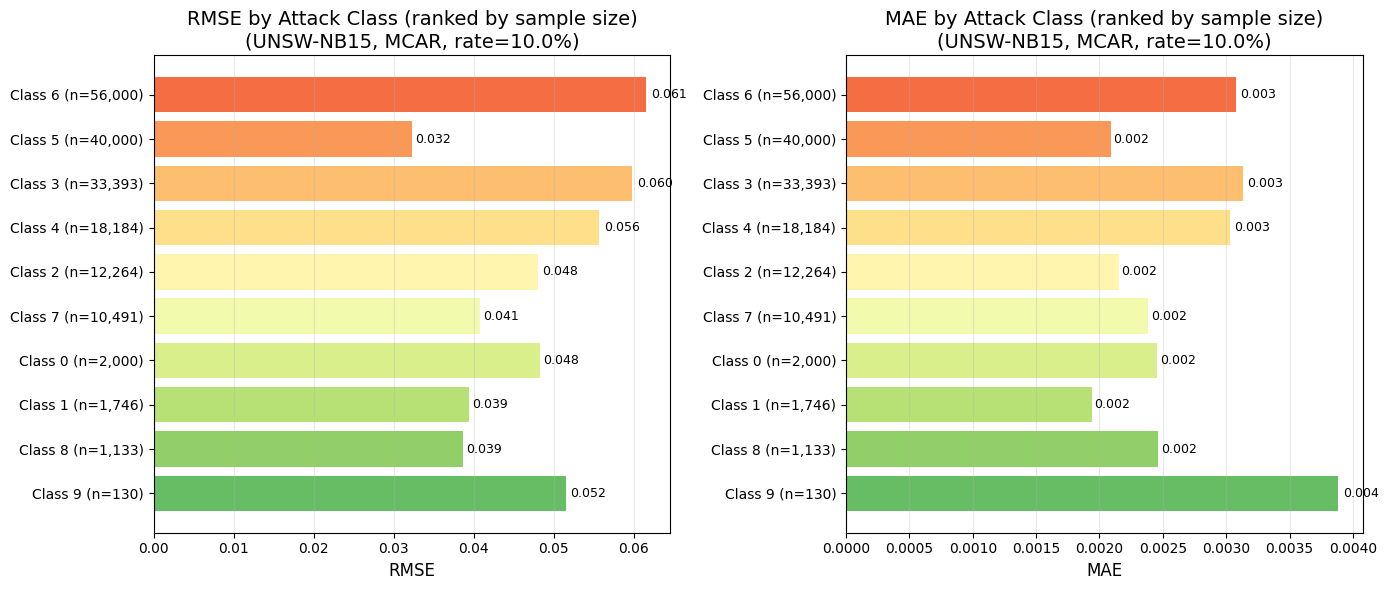


PER-CLASS RMSE SUMMARY (ranked by sample size)
Best class (lowest RMSE):  Class 5 (RMSE=0.0323)
Worst class (highest RMSE): Class 6 (RMSE=0.0615)
Average RMSE across classes: 0.0476

Sample size range: 130.0 - 56,000.0


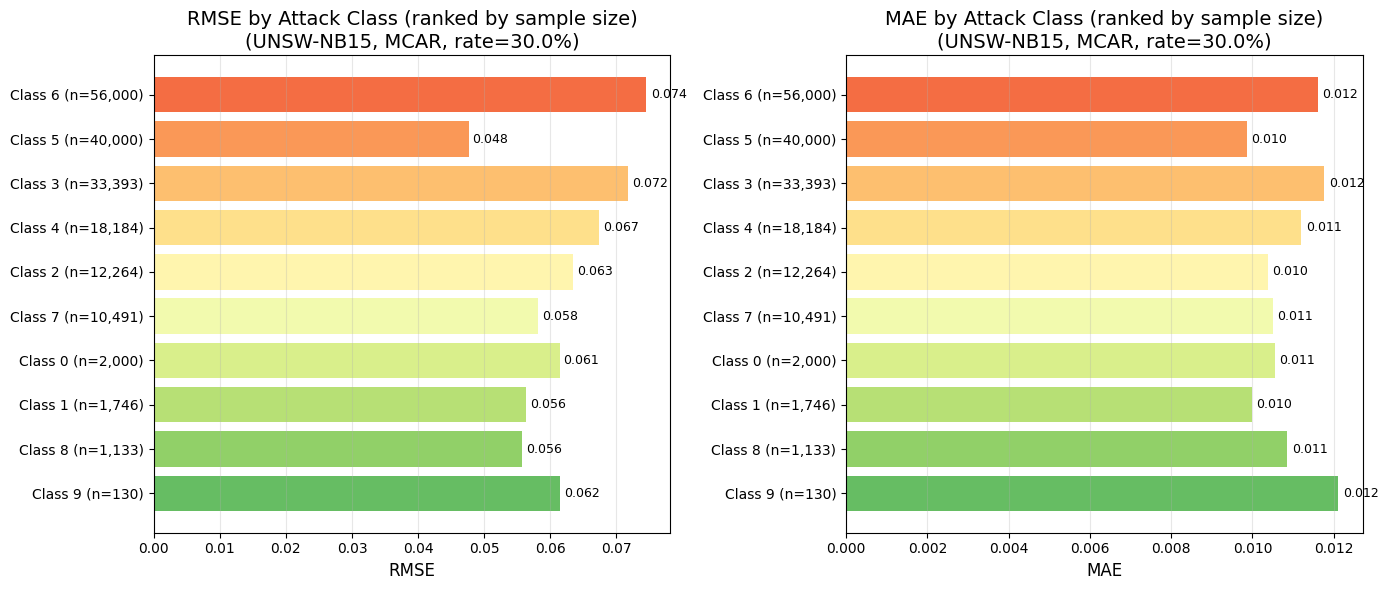


PER-CLASS RMSE SUMMARY (ranked by sample size)
Best class (lowest RMSE):  Class 5 (RMSE=0.0478)
Worst class (highest RMSE): Class 6 (RMSE=0.0745)
Average RMSE across classes: 0.0618

Sample size range: 130.0 - 56,000.0


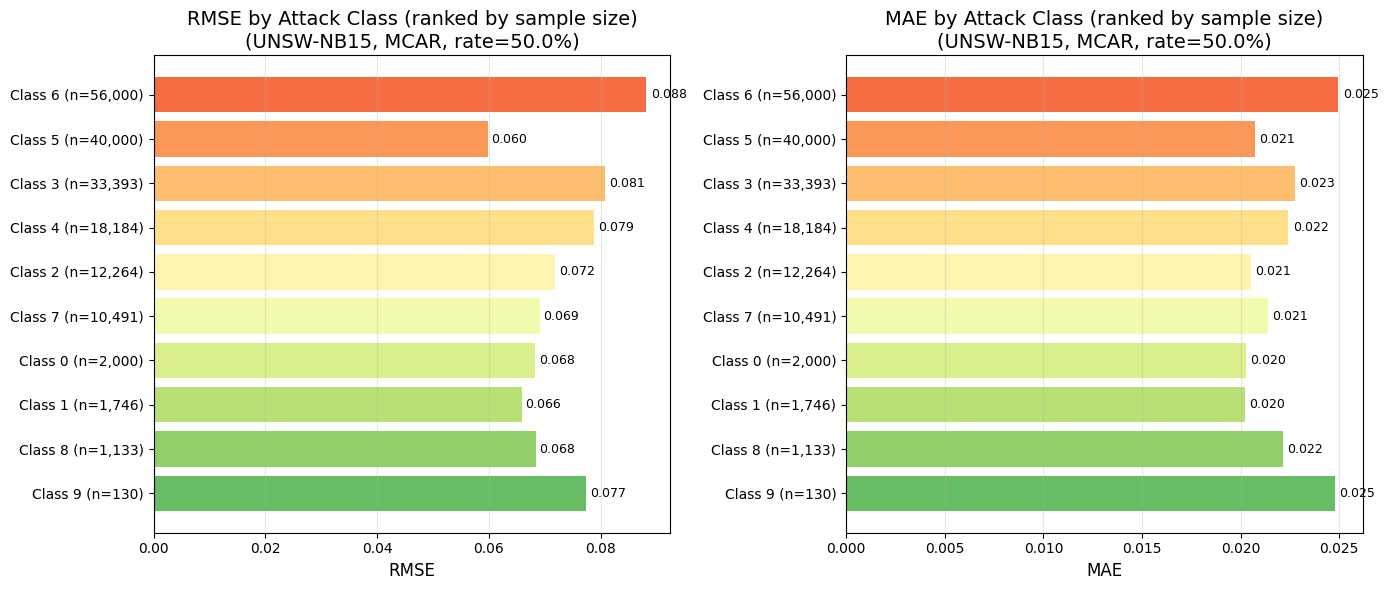


PER-CLASS RMSE SUMMARY (ranked by sample size)
Best class (lowest RMSE):  Class 5 (RMSE=0.0598)
Worst class (highest RMSE): Class 6 (RMSE=0.0881)
Average RMSE across classes: 0.0728

Sample size range: 130.0 - 56,000.0


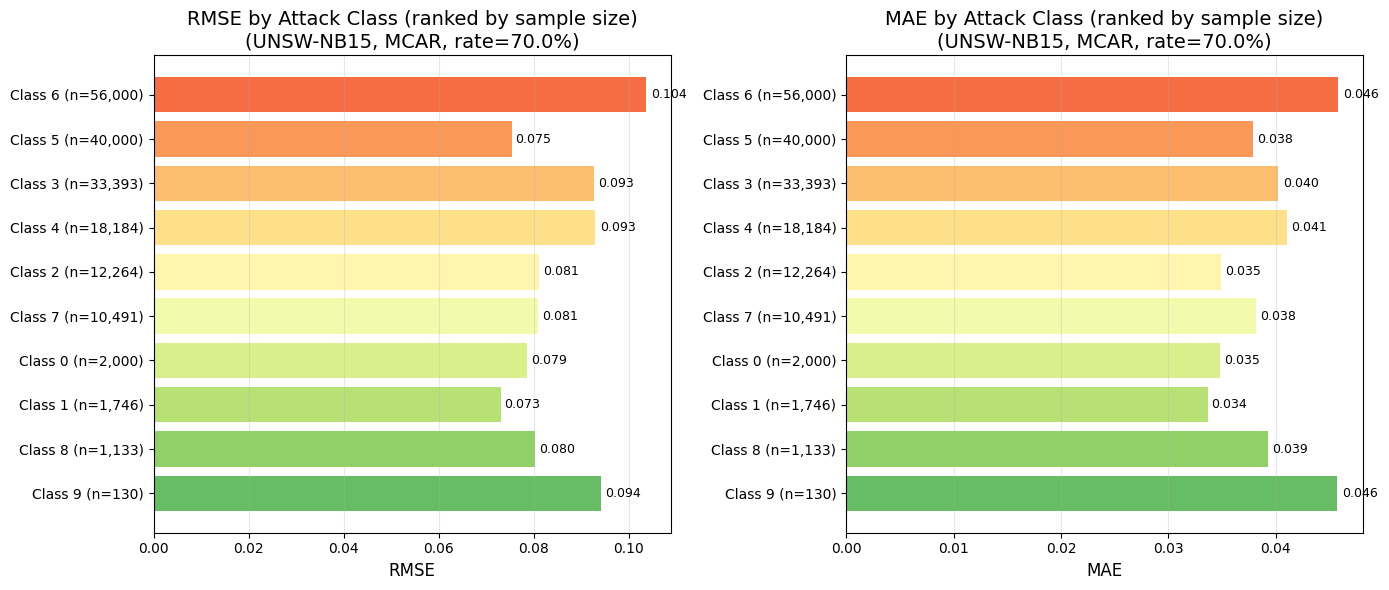


PER-CLASS RMSE SUMMARY (ranked by sample size)
Best class (lowest RMSE):  Class 1 (RMSE=0.0731)
Worst class (highest RMSE): Class 6 (RMSE=0.1036)
Average RMSE across classes: 0.0852

Sample size range: 130.0 - 56,000.0


In [43]:
for idx in avg_metrics_normed:

    class_metrics_df = avg_metrics_normed[idx]
    class_metrics_df_sorted = class_metrics_df.sort_values('n_samples', ascending=True)
    
    fig_height = max(6, len(class_metrics_df) * 0.6) 
    fig, axes = plt.subplots(1, 2, figsize=(14, fig_height))
    
    ax1 = axes[0]
    colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(class_metrics_df_sorted)))
    bars = ax1.barh(range(len(class_metrics_df_sorted)), class_metrics_df_sorted['RMSE'], color=colors)
    ax1.set_yticks(range(len(class_metrics_df_sorted)))
    ax1.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(class_metrics_df_sorted['class'], class_metrics_df_sorted['n_samples'])])
    ax1.set_xlabel('RMSE', fontsize=12)
    ax1.set_title(f'RMSE by Attack Class (ranked by sample size)\n(UNSW-NB15, MCAR, rate={100*idx}%)', fontsize=14)
    ax1.grid(True, alpha=0.3, axis='x')
    
    for i, (bar, val, n) in enumerate(zip(bars, class_metrics_df_sorted['RMSE'], class_metrics_df_sorted['n_samples'])):
        offset = val * 0.01 
        ax1.text(val + offset, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
                 va='center', ha='left', fontsize=9)
    
    ax2 = axes[1]
    bars = ax2.barh(range(len(class_metrics_df_sorted)), class_metrics_df_sorted['MAE'], color=colors)
    ax2.set_yticks(range(len(class_metrics_df_sorted)))
    ax2.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(class_metrics_df_sorted['class'], class_metrics_df_sorted['n_samples'])])
    ax2.set_xlabel('MAE', fontsize=12)
    ax2.set_title(f'MAE by Attack Class (ranked by sample size)\n(UNSW-NB15, MCAR, rate={100*idx}%)', fontsize=14)
    ax2.grid(True, alpha=0.3, axis='x')
    
    for i, (bar, val, n) in enumerate(zip(bars, class_metrics_df_sorted['MAE'], class_metrics_df_sorted['n_samples'])):
        offset = val * 0.01 
        ax2.text(val + offset, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
                 va='center', ha='left', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 60)
    print("PER-CLASS RMSE SUMMARY (ranked by sample size)")
    print("=" * 60)
    print(f"Best class (lowest RMSE):  Class {int(class_metrics_df.loc[class_metrics_df['RMSE'].idxmin(), 'class'])} (RMSE={class_metrics_df['RMSE'].min():.4f})")
    print(f"Worst class (highest RMSE): Class {int(class_metrics_df.loc[class_metrics_df['RMSE'].idxmax(), 'class'])} (RMSE={class_metrics_df['RMSE'].max():.4f})")
    print(f"Average RMSE across classes: {class_metrics_df['RMSE'].mean():.4f}")
    print(f"\nSample size range: {class_metrics_df['n_samples'].min():,} - {class_metrics_df['n_samples'].max():,}")

In [49]:
def variance_metrics_function(X_true_normalized, imputed_normalized, mask):
    variance_metrics = []
    
    unique_classes = np.unique(class_labels)
    
    for cls in unique_classes:
        cls_mask = class_labels[class_labels == cls].index
        
        # Get the true and imputed values for this class
        true_cls = X_true_normalized.iloc[cls_mask, :].to_numpy()
        imputed_cls = imputed_normalized.iloc[cls_mask, :].to_numpy()
        mask_cls = mask.iloc[cls_mask, :].to_numpy() # in this case 1 is missing, 0 is obs
        
        # Flatten for variance computation
        true_flat = true_cls.flatten()
        imputed_flat = imputed_cls.flatten()
        mask_flat = mask_cls.flatten()
        
        # Separate imputed positions (where data was missing) and observed positions
        missing_positions = mask_flat == 1
        observed_positions = mask_flat == 0
        
        # Get imputed values (values at positions that were missing)
        imputed_values = imputed_flat[missing_positions]
        
        # Get observed values (original values at positions that were observed)
        observed_values = true_flat[observed_positions]
        
        # Compute variance
        if len(imputed_values) > 1:
            var_imputed = np.var(imputed_values)
        else:
            var_imputed = np.nan
            
        if len(observed_values) > 1:
            var_observed = np.var(observed_values)
        else:
            var_observed = np.nan
        
        # Compute variance ratio (imputed / observed)
        if var_observed > 0:
            var_ratio = var_imputed / var_observed
        else:
            var_ratio = np.nan
        
        n_samples = np.sum(cls_mask)
        n_missing = np.sum(missing_positions)
        n_observed = np.sum(observed_positions)
        
        variance_metrics.append({
            'class': int(cls),
            'n_samples': n_samples,
            'n_missing': n_missing,
            'n_observed': n_observed,
            'var_imputed': var_imputed,
            'var_observed': var_observed,
            'var_ratio': var_ratio
        })
    
    variance_df = pd.DataFrame(variance_metrics)
    return variance_df

In [50]:
variance_metrics = {}  
variance_metrics_normed = {}

data_mean = np.mean(df.iloc[:, :39].values, axis=0, keepdims=True)
data_std = np.std(df.iloc[:, :39].values, axis=0, keepdims=True)

for prop in [0.1, 0.3, 0.5, 0.7]:
    print("Missing proportion:", prop)
    variance_metrics[prop] = {}
    variance_metrics_normed[prop] = {}
    for trial in range(5):
        print("Trial:", trial)
        res = variance_metrics_function(gt[prop][trial].iloc[:, :39], 
                               simpdm_imputed[prop][trial].iloc[:, :39],
                               mask[prop][trial].iloc[:, :39])
        variance_metrics_normed[prop][trial] = res
        
        # simpdm_unreg = simpdm_imputed[prop][trial].iloc[:, :39] * data_std + data_mean
        # gt_unreg = gt[prop][trial].iloc[:, :39] * data_std + data_mean
        # res = metrics_function(df.iloc[:, :39], 
        #                        simpdm_unreg,
        #                        mask[prop][trial].iloc[:, :39])
        # all_metrics[prop][trial] = res

Missing proportion: 0.1
Trial: 0
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Missing proportion: 0.3
Trial: 0
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Missing proportion: 0.5
Trial: 0
Trial: 1
Trial: 2
Trial: 3
Trial: 4
Missing proportion: 0.7
Trial: 0
Trial: 1
Trial: 2
Trial: 3
Trial: 4


In [52]:
# avg_metrics = {}
avg_variance_metrics_normed = {}

for prop in [0.1, 0.3, 0.5, 0.7]:
    # dfs = []
    dfs_normed = []
    for trial in range(5):
        # df_trial = all_metrics[prop][trial].copy()
        # dfs.append(df_trial)

        df_trial_normed = variance_metrics_normed[prop][trial].copy()
        dfs_normed.append(df_trial_normed)

    # combined = pd.concat(dfs, axis=0)
    # avg_df = combined.groupby("class").mean(numeric_only=True)
    # avg_df = avg_df.reset_index()

    # avg_metrics[prop] = avg_df

    combined_normed = pd.concat(dfs_normed, axis=0)
    avg_df_normed = combined_normed.groupby("class").mean(numeric_only=True)
    avg_df_normed = avg_df_normed.reset_index()

    avg_variance_metrics_normed[prop] = avg_df_normed

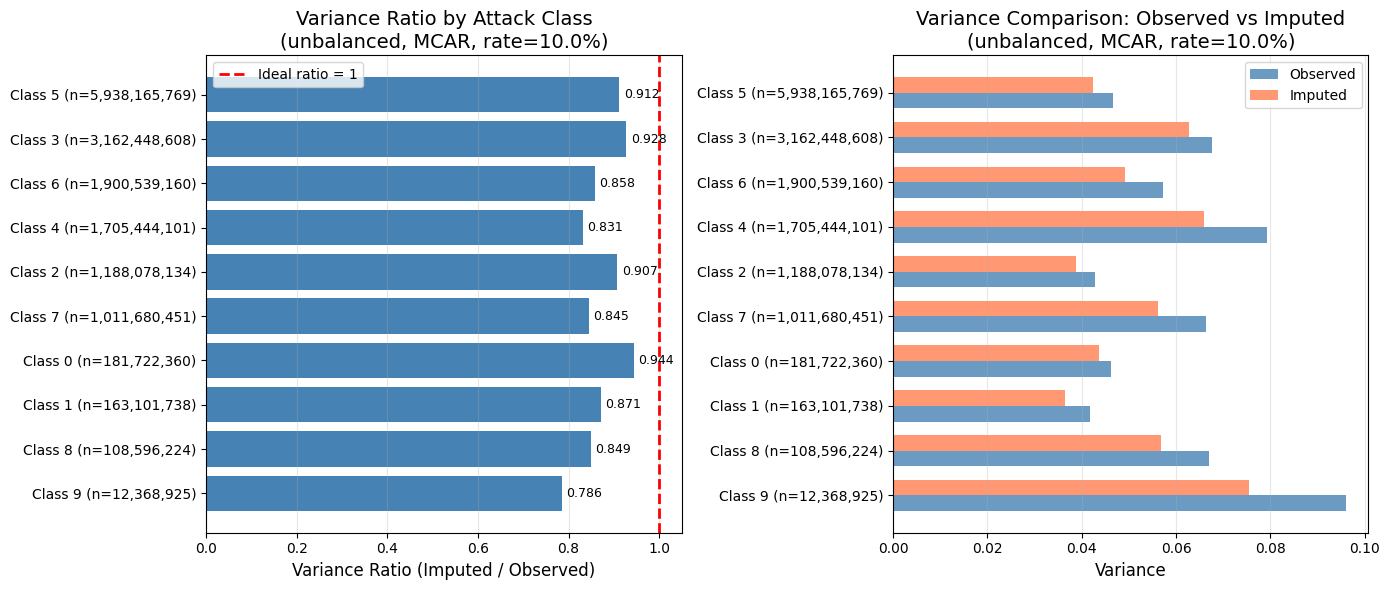


VARIANCE ANALYSIS SUMMARY
All classes have variance ratio < 1 (under-dispersion): True
Classes with ratio < 0.5 (significant under-dispersion): 0 / 10

This indicates the imputation model tends to produce values closer to the mean,
resulting in lower variance compared to the true observed data distribution.


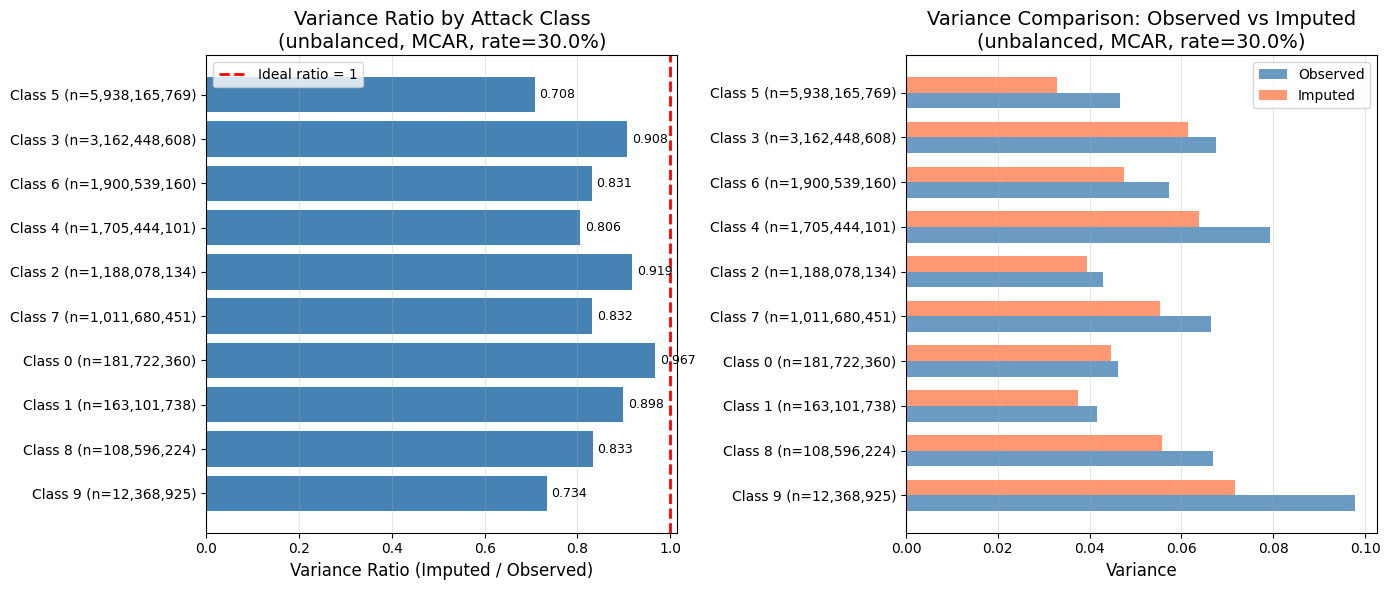


VARIANCE ANALYSIS SUMMARY
All classes have variance ratio < 1 (under-dispersion): True
Classes with ratio < 0.5 (significant under-dispersion): 0 / 10

This indicates the imputation model tends to produce values closer to the mean,
resulting in lower variance compared to the true observed data distribution.


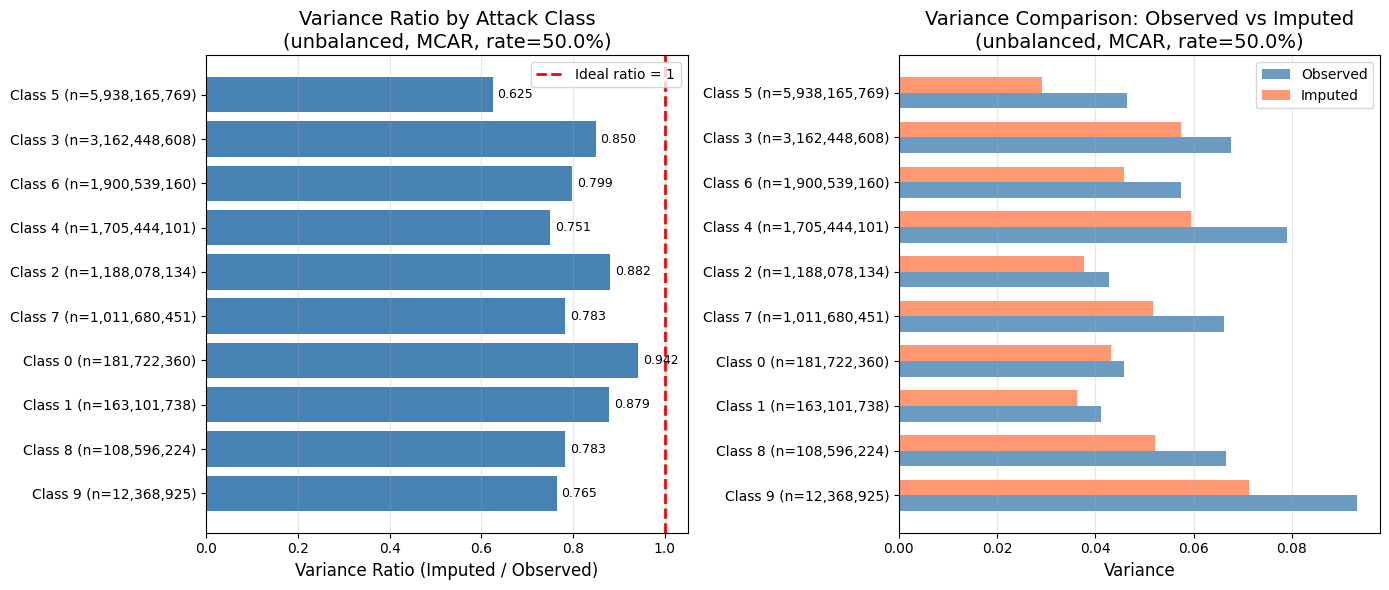


VARIANCE ANALYSIS SUMMARY
All classes have variance ratio < 1 (under-dispersion): True
Classes with ratio < 0.5 (significant under-dispersion): 0 / 10

This indicates the imputation model tends to produce values closer to the mean,
resulting in lower variance compared to the true observed data distribution.


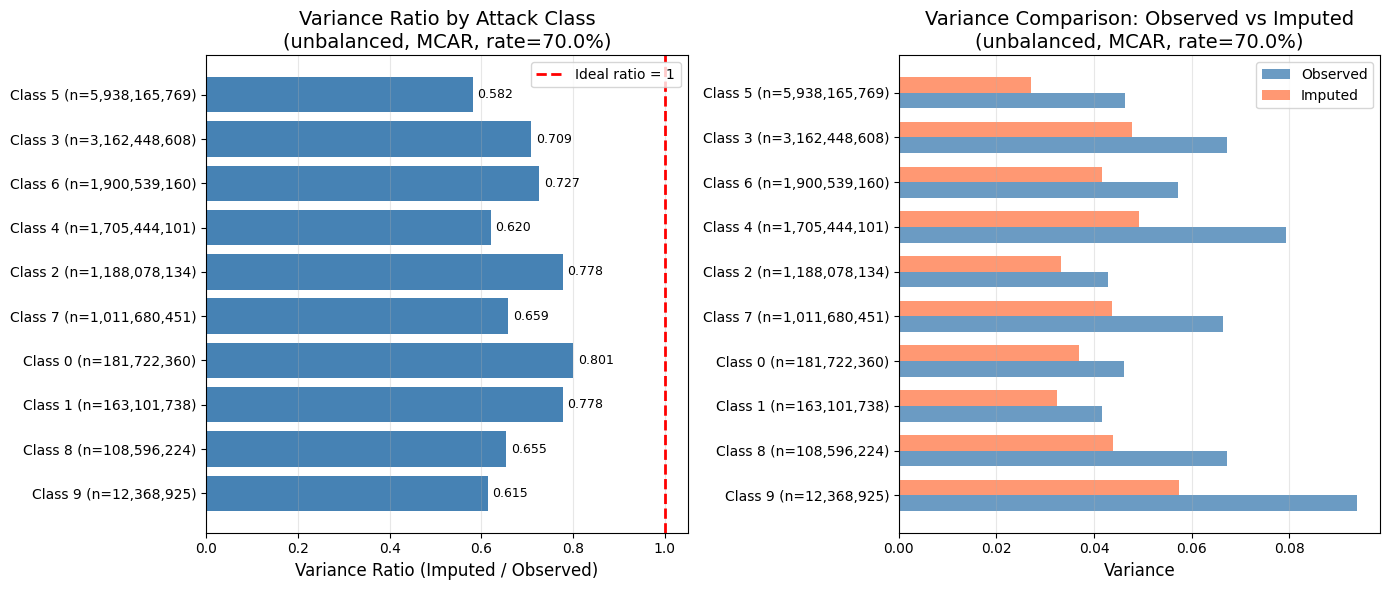


VARIANCE ANALYSIS SUMMARY
All classes have variance ratio < 1 (under-dispersion): True
Classes with ratio < 0.5 (significant under-dispersion): 0 / 10

This indicates the imputation model tends to produce values closer to the mean,
resulting in lower variance compared to the true observed data distribution.


In [56]:
dataname = "unbalanced"
mask_type = "MCAR"

for key in avg_variance_metrics_normed:
    # Visualize variance ratio by class (ranked by sample size)
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Sort by sample size
    variance_df = avg_variance_metrics_normed[key]
    variance_df_sorted = variance_df.sort_values('n_samples', ascending=True)
    
    # Variance ratio by class
    ax1 = axes[0]
    colors = np.where(variance_df_sorted['var_ratio'] < 1, 'steelblue', 'coral')
    bars = ax1.barh(range(len(variance_df_sorted)), variance_df_sorted['var_ratio'], color=colors)
    ax1.axvline(x=1, color='red', linestyle='--', linewidth=2, label='Ideal ratio = 1')
    ax1.set_yticks(range(len(variance_df_sorted)))
    ax1.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(variance_df_sorted['class'], variance_df_sorted['n_samples'])])
    ax1.set_xlabel('Variance Ratio (Imputed / Observed)', fontsize=12)
    ax1.set_title(f'Variance Ratio by Attack Class\n({dataname}, {mask_type}, rate={100*key}%)', fontsize=14)
    ax1.grid(True, alpha=0.3, axis='x')
    ax1.legend()
    
    # Add value labels
    for i, (bar, val) in enumerate(zip(bars, variance_df_sorted['var_ratio'])):
        ax1.text(val + 0.01, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
                 va='center', ha='left', fontsize=9)
    
    # Compare imputed vs observed variance
    ax2 = axes[1]
    x = np.arange(len(variance_df_sorted))
    width = 0.35
    
    bars1 = ax2.barh(x - width/2, variance_df_sorted['var_observed'], width, label='Observed', color='steelblue', alpha=0.8)
    bars2 = ax2.barh(x + width/2, variance_df_sorted['var_imputed'], width, label='Imputed', color='coral', alpha=0.8)
    ax2.set_yticks(x)
    ax2.set_yticklabels([f"Class {int(c)} (n={int(n):,})" for c, n in zip(variance_df_sorted['class'], variance_df_sorted['n_samples'])])
    ax2.set_xlabel('Variance', fontsize=12)
    ax2.set_title(f'Variance Comparison: Observed vs Imputed\n({dataname}, {mask_type}, rate={100*key}%)', fontsize=14)
    ax2.grid(True, alpha=0.3, axis='x')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print("\n" + "=" * 80)
    print("VARIANCE ANALYSIS SUMMARY")
    print("=" * 80)
    print(f"All classes have variance ratio < 1 (under-dispersion): {(variance_df['var_ratio'] < 1).all()}")
    print(f"Classes with ratio < 0.5 (significant under-dispersion): {(variance_df['var_ratio'] < 0.5).sum()} / {len(variance_df)}")
    print(f"\nThis indicates the imputation model tends to produce values closer to the mean,")
    print(f"resulting in lower variance compared to the true observed data distribution.")